<a href="https://colab.research.google.com/github/amitsingh-aith/Sugarcane-Production-EDA/blob/main/Sugarcane_Production_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sugarcane Production Analysis**

In [190]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [191]:
List_of_Countries = '/content/drive/MyDrive/List of Countries by Sugarcane Production.csv'

In [192]:
df = pd.read_csv(List_of_Countries)

In [193]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [194]:
df.shape

(103, 7)

# **Data Cleaning**

In [195]:
df["Production (Tons)"]= df["Production (Tons)"].str.replace("." , "")
df["Production per Person (Kg)"]= df["Production per Person (Kg)"].str.replace("." , "").str.replace(",",".")
df["Acreage (Hectare)"]= df["Acreage (Hectare)"].str.replace("." , "")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace("." , "").str.replace(",",".")

In [196]:
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,28386.4
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,11949.8


In [197]:
df.rename(columns={'Production (Tons)' : 'Production(Tons)'}, inplace=True)
df.rename(columns={'Production per Person (Kg)' : 'Production_per_person(Kg)'}, inplace=True)
df.rename(columns={'Acreage (Hectare)' : 'Acreage(Hect)'}, inplace=True)
df.rename(columns={'Yield (Kg / Hectare)' : 'Yield(Kg/Hect)'}, inplace=True)

In [198]:
df.isna().sum()

,0
Unnamed: 0,0
Country,0
Continent,0
Production(Tons),0
Production_per_person(Kg),0
Acreage(Hect),1
Yield(Kg/Hect),1


In [199]:
df[df["Acreage(Hect)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hect),Yield(Kg/Hect)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [200]:
df=df.dropna().reset_index()

In [201]:
df.head()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hect),Yield(Kg/Hect)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [202]:
df.drop(["index","Unnamed: 0"], axis = 1, inplace = True)

In [203]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),object
Production_per_person(Kg),object
Acreage(Hect),object
Yield(Kg/Hect),object


In [204]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hect)"] = df["Acreage(Hect)"].astype(float)
df["Yield(Kg/Hect)"] = df["Yield(Kg/Hect)"].astype(float)

In [205]:
df.dtypes

,0
Country,object
Continent,object
Production(Tons),float64
Production_per_person(Kg),float64
Acreage(Hect),float64
Yield(Kg/Hect),float64


In [206]:
df.nunique()

,0
Country,102
Continent,6
Production(Tons),102
Production_per_person(Kg),101
Acreage(Hect),101
Yield(Kg/Hect),102


**Univariate Analysis**

In [207]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hect),Yield(Kg/Hect)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


**How many countries produce sugarcane from each continent?**

In [208]:
df["Continent"].value_counts()


,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


<Axes: xlabel='Continent'>

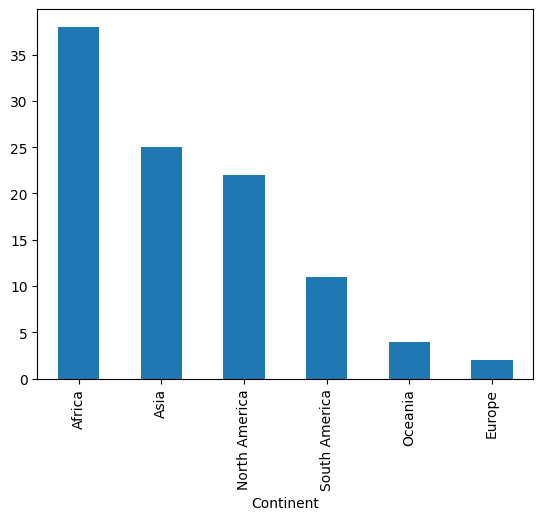

In [209]:
df["Continent"].value_counts().plot(kind="bar")

**Distribution of the columns**

/tmp/ipython-input-748422319.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
/tmp/ipython-input-748422319.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(Kg)"])
/tmp/ipython-input-748422319.py:9: UserWarning: 

`distplot` is a deprecated 

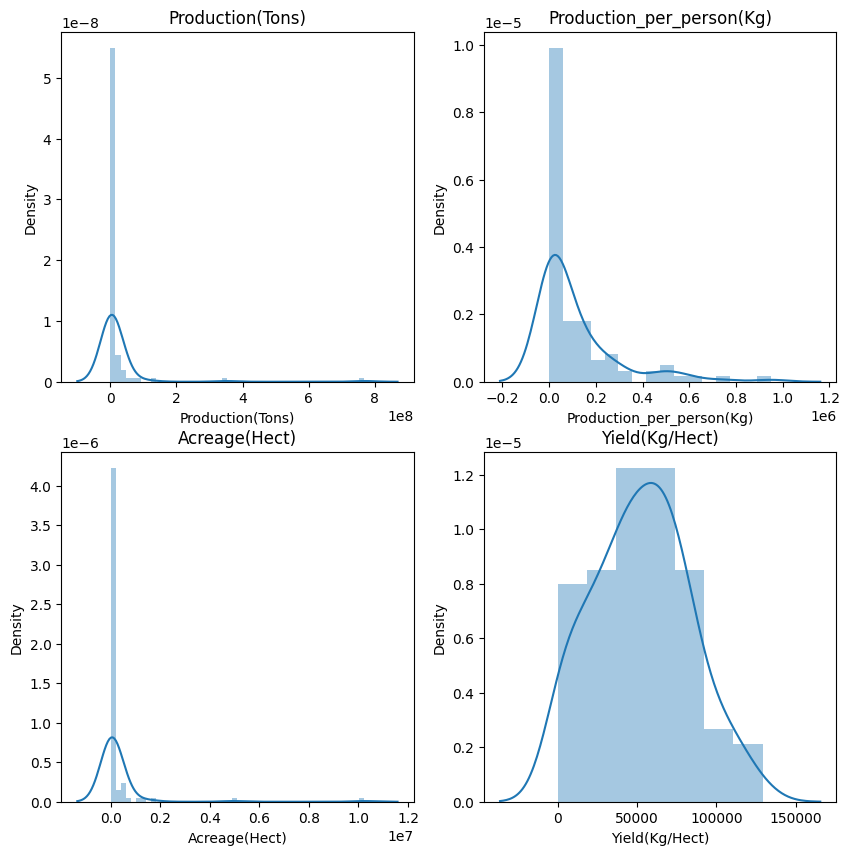

In [210]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hect)"])
plt.title("Acreage(Hect)")
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hect)"])
plt.title("Yield(Kg/Hect)")
plt.show()

**Checking outliers**

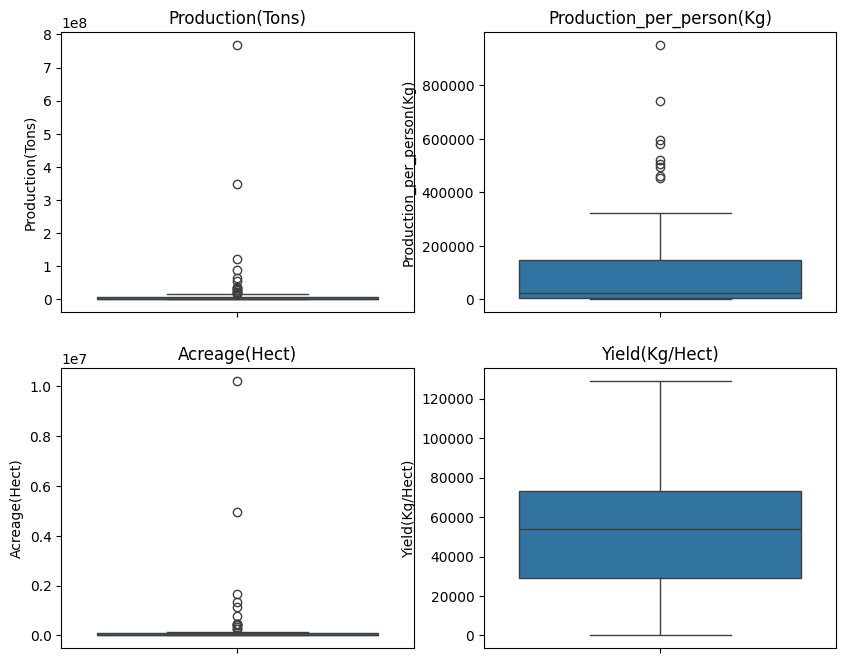

In [211]:
plt.figure(figsize = (10,8))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hect)"])
plt.title("Acreage(Hect)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hect)"])
plt.title("Yield(Kg/Hect)")
plt.show()

In [212]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hect),Yield(Kg/Hect)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# Bivariate Analysis

Which country produces maximum sugarcane ?

In [213]:
df_new = df[["Country","Production(Tons)"]].set_index("Country")
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [214]:
df_new["Production(Tons)_percent"]= df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()
df_new

,Production(Tons),Production(Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percent'>

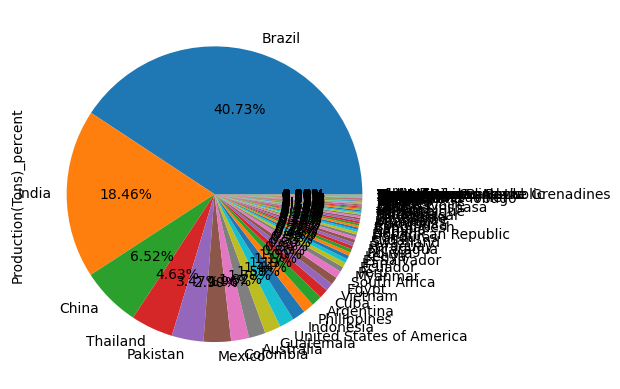

In [215]:
df_new["Production(Tons)_percent"].plot(kind= "pie", autopct= "%.2f%%")

<Axes: xlabel='Country'>

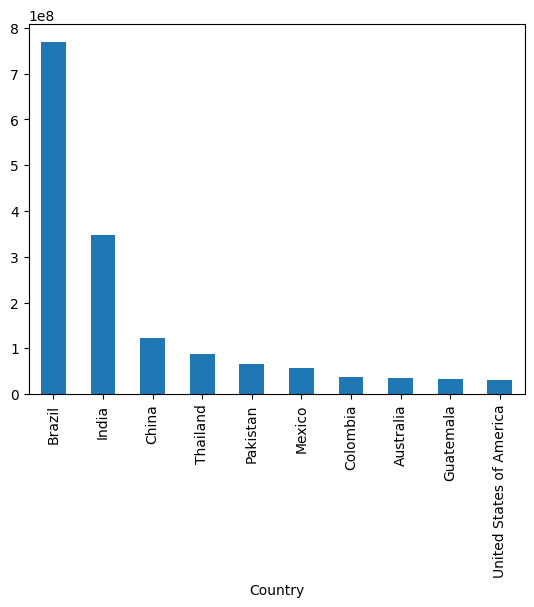

In [216]:
df_new["Production(Tons)"].head(10).plot(kind= "bar")

/tmp/ipython-input-1178598333.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


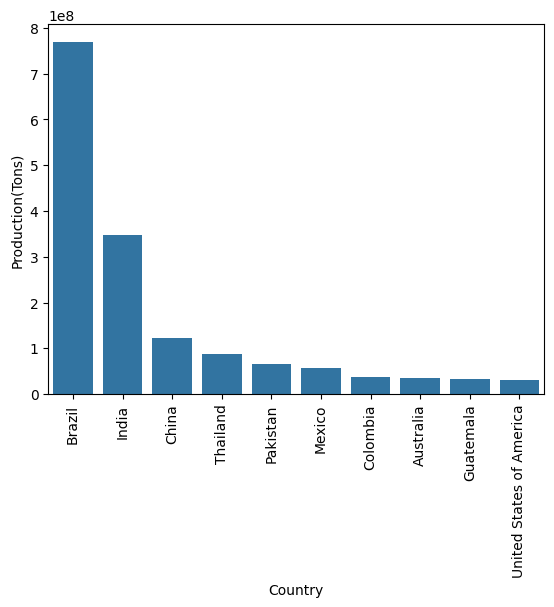

In [217]:
ax = sns.barplot(data= df.head(10),x= "Country", y= "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

/tmp/ipython-input-1668462078.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-1668462078.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


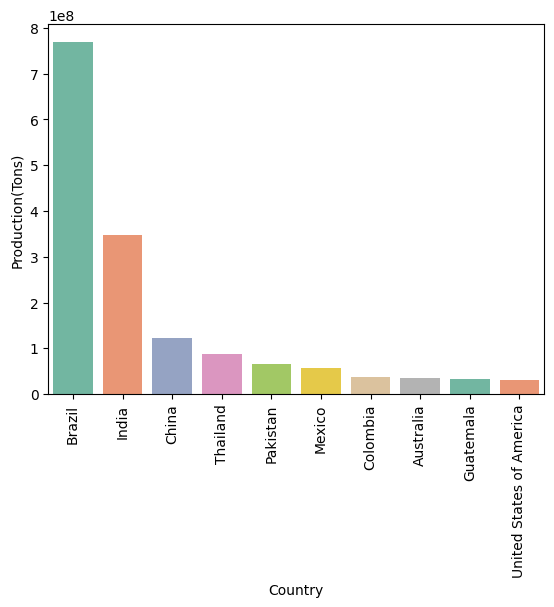

In [218]:
ax = sns.barplot(
    data=df.head(10),
    x="Country",
    y="Production(Tons)",
    palette="Set2"   # or "Blues", "viridis", "tab10", etc.
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

**Which country has the highest land**

/tmp/ipython-input-866723964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-866723964.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


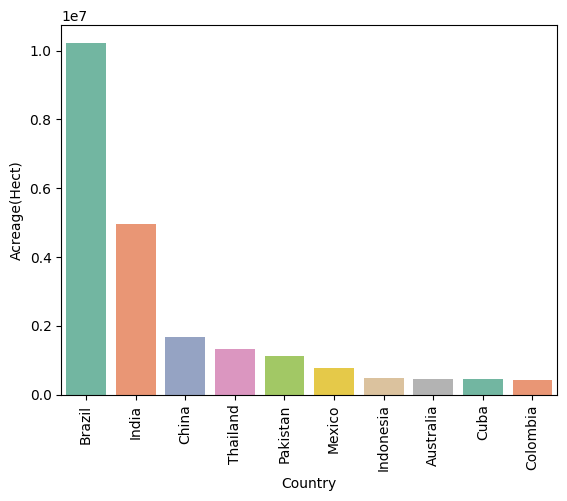

In [219]:
df_acr = df.sort_values("Acreage(Hect)", ascending = False)

ax = sns.barplot(
    data=df_acr.head(10), x="Country", y="Acreage(Hect)",palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Which country has the highest yield per hectare.

/tmp/ipython-input-3974010406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-3974010406.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


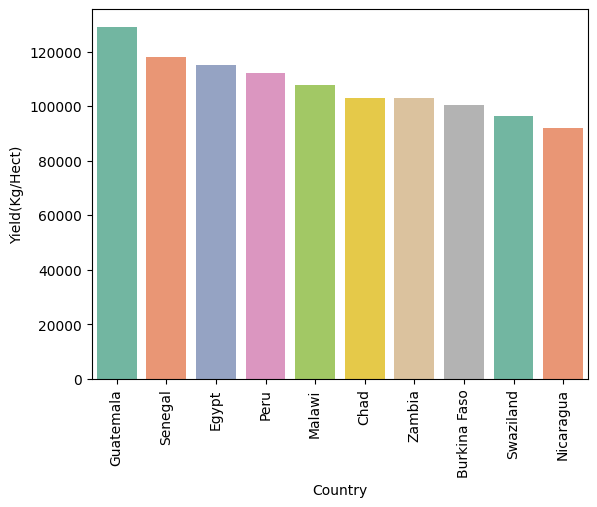

In [220]:
df_yield = df.sort_values("Yield(Kg/Hect)", ascending = False)

ax = sns.barplot(
    data=df_yield.head(10), x="Country", y="Yield(Kg/Hect)",palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Which country has the highest production per person(Kg)

/tmp/ipython-input-2018641843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-2018641843.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


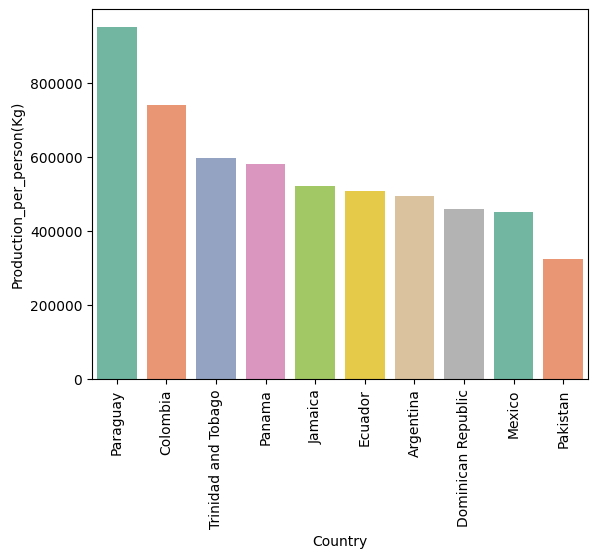

In [221]:
df_prod_Per_person = df.sort_values("Production_per_person(Kg)", ascending = False)

ax = sns.barplot(
    data=df_prod_Per_person.head(10), x="Country", y="Production_per_person(Kg)",palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# **Correlation**

<Axes: >

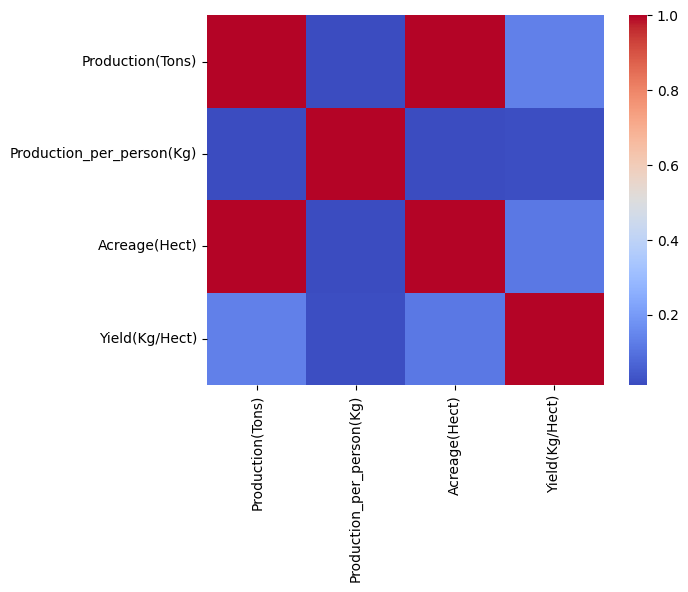

In [222]:
sns.heatmap(df.corr(numeric_only= True), cmap= "coolwarm")

Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hect)', ylabel='Production(Tons)'>

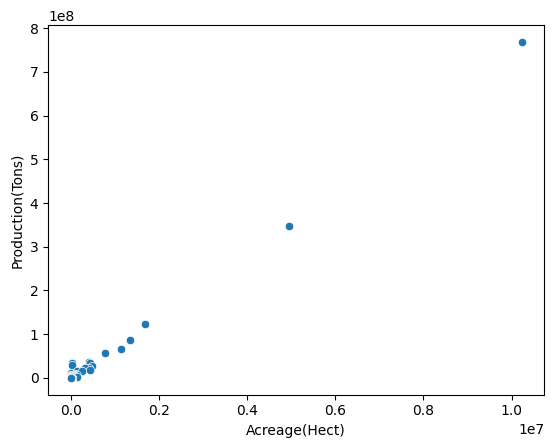

In [223]:
sns.scatterplot(data= df, x= "Acreage(Hect)", y= "Production(Tons)")

Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hect)', ylabel='Production(Tons)'>

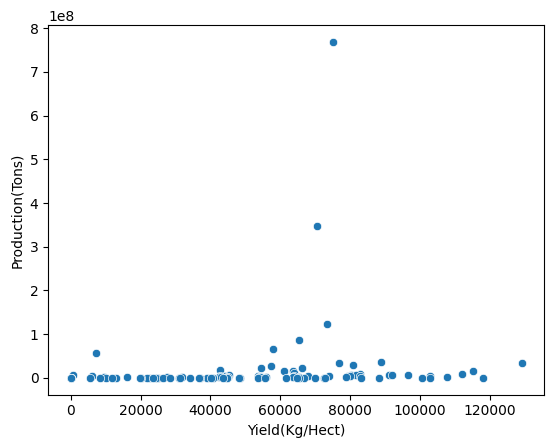

In [224]:
sns.scatterplot(data= df, x= "Yield(Kg/Hect)", y= "Production(Tons)")

# Analysis for continent.

In [225]:
df_continent = df.groupby("Continent").sum()

In [226]:
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hect),Yield(Kg/Hect)
Continent,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7


Which continent produces maximum sugarcane?

In [227]:
df["Continent"].value_counts()

,count
Continent,
Africa,38
Asia,25
North America,22
South America,11
Oceania,4
Europe,2


<Axes: xlabel='Continent'>

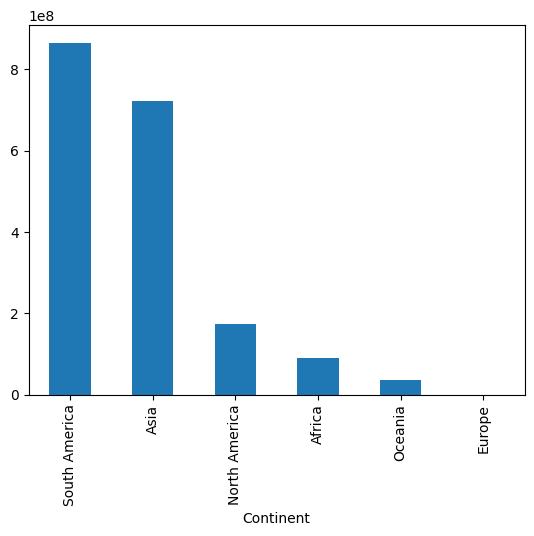

In [228]:
df_continent["Production(Tons)"].sort_values(ascending = False).plot(kind= "bar")

<Axes: xlabel='Continent'>

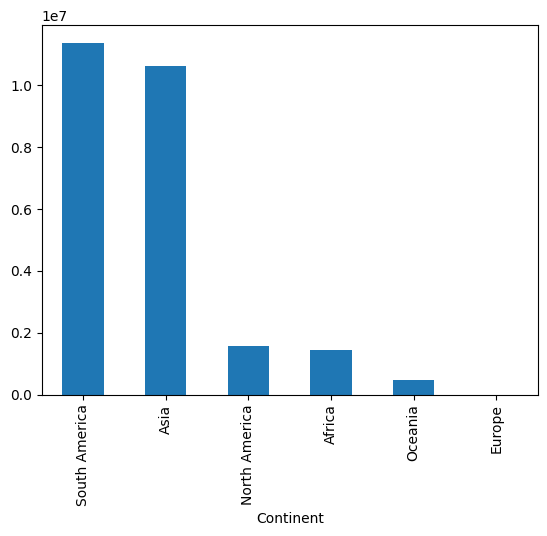

In [229]:
df_continent["Acreage(Hect)"].sort_values(ascending = False).plot(kind= "bar")

Do number of countries in a continent effects production of sugarcane?

In [230]:
df_continent["number_of_countries"]= df.groupby("Continent").count()["Country"]

In [231]:
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hect),Yield(Kg/Hect),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


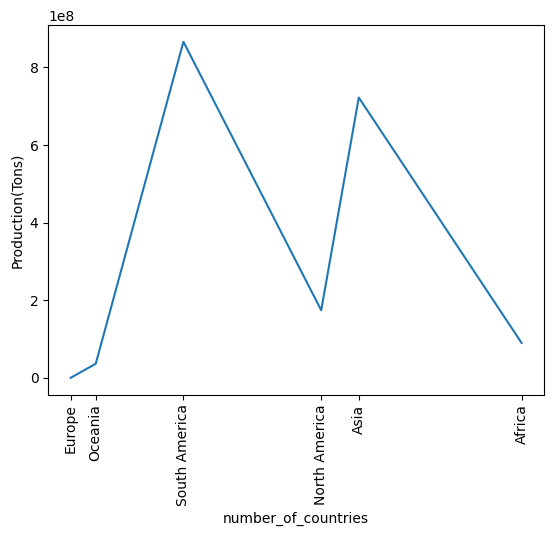

In [232]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent, x= "number_of_countries", y="Production(Tons)")
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hect)', ylabel='Production(Tons)'>

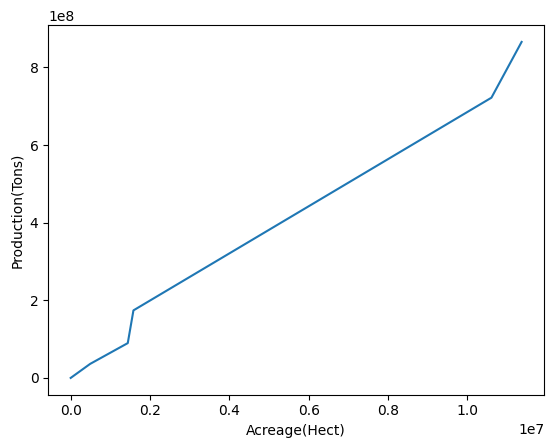

In [233]:
sns.lineplot(data = df_continent,x = "Acreage(Hect)", y= "Production(Tons)" )

Production distribution by continent.

<Axes: ylabel='Production(Tons)'>

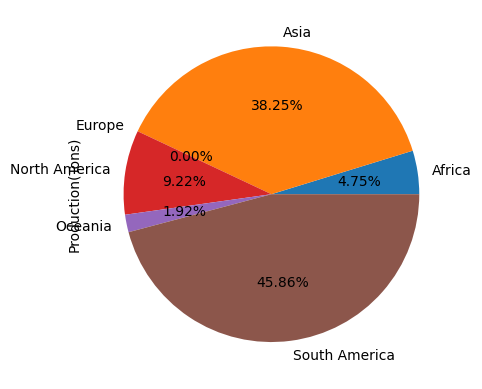

In [234]:
df_continent["Production(Tons)"].plot(kind= "pie", autopct = "%.2f%%")

# Correlation for continent

In [235]:
df_continent_numeric = df_continent.drop("Country", axis=1)
display(df_continent_numeric.corr())

,Production(Tons),Production_per_person(Kg),Acreage(Hect),Yield(Kg/Hect),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hect),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hect),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
